In [5]:
# Standard libraries
from copy import deepcopy

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "chernysheva-tmaze-analysis-2020"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from scipy.stats import mannwhitneyu, wilcoxon, binom_test, combine_pvalues

# User libraries
from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.utils.arrays import numpy_merge_dimensions
from mesostat.stat.connectomics import offdiag_1D
from mesostat.visualization.mpl_matrix import imshow
from mesostat.visualization.mpl_colors import custom_grad_cmap


from src.lib.data_db import BehaviouralNeuronalDatabase
import src.lib.table_lib as table_lib
from src.lib.metric_wrapper import metric_by_selector_all, metric_by_selector
from src.lib.extra_metrics import num_non_zero_std, num_sample
from src.lib.significant_cells_lib import SignificantCells
import src.lib.analysis.phases_intervals as phases_intervals

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/chernysheva-tmaze-analysis-2020


In [6]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
#params['root_path_data']  = gui_fpath("Path to data files", "./")
params['root_path_dff'] = '/media/alyosha/Data/TE_data/mariadata/dff/'
params['root_path_deconv'] = '/media/alyosha/Data/TE_data/mariadata/deconv/'
# params['root_path_dff'] = '/media/aleksejs/DataHDD/work/data/maria/dff/'
# params['root_path_deconv'] = '/media/aleksejs/DataHDD/work/data/maria/deconv/'

In [7]:
dataDB = BehaviouralNeuronalDatabase(params)

In [8]:
dataDB.read_neuro_files()

IntProgress(value=0, description='Read DFF Data:', max=27)

IntProgress(value=0, description='Read DECONV Data:', max=27)

In [9]:
dataDB.read_behavior_files()

IntProgress(value=0, description='Read Neuro Data:', max=27)

No trials found for Trial_LWhole_Mistake skipping
No trials found for Trial_RWhole_Mistake skipping
No trials found for Trial_LWhole_Mistake skipping


# 1. Neuron-Time-Average

**Goal**: Explore phase and interval specificity of bulk signal

**Note**: Already done by Maria, no need to repeat

In [10]:
# cmapConfusion = gen_cmap_3color(
#     np.array([255, 255, 255]),
#     np.array([168, 217, 49]),
#     np.array([255, 0, 0])
# )

cmapConfusion = custom_grad_cmap(
    np.array([
        [0,0,0],
        [255,198,126],
        [233,79,25]
    ])
)

cmapSignificance = custom_grad_cmap(
    np.array([
        [255, 255, 255],
        [233, 79, 25]
    ])
)

# 2 Time-Average

**Goal**: Explore phase and interval specificity of individual neurons

## 2.1. Average activity

Compute average signal for a matrix [Channel x Interval], plot

In [11]:
for datatype in ['raw', 'deconv', 'zscore']:
    for phasetype in ['semiphase']:#['interval', 'phase', 'semiphase']:
        phases_intervals.plot_avg_firing_rate_by_neuron(dataDB, datatype, phasetype, haveWaiting=False, cmap=cmapConfusion)

m060
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
m061
No behaviour found for {'performance': 'Mistake', 'direction': 'R', 'session': 'm061_20190517'} ; skipping
No behaviour found for {'pe

m068


# 2.2 Active cells

* For each neuron, determine baseline above which we consider there to be some activity
* For each neuron and each interval, count fraction of trials in which cell active

**Complications**:
* How exactly to define a "sufficiently active" cell?
* How to compute a firing threshold? Is constant ok, or need be cell-specific?
* Need to control for different interval duration across trials?
* Need to control for different interval duration across intervals?

In [14]:
for datatype in ['deconv']:
    for phasetype in ['semiphase']:#['interval', 'phase', 'semiphase']:
        phases_intervals.plot_count_active_trials_by_neuron(dataDB, datatype, phasetype, 0.18, 0.2, haveWaiting=False)

Correct m060
Correct m061
Correct m065
Correct m066
Correct m067
Correct m068
Mistake m060
Mistake m061
Mistake m065
Mistake m066
Mistake m067
Mistake m068


Questions of interest:
* [+] Is phase-specific activity explained by
    - frequency active?
    - magnitude when active?
    - both?
* Why are there more active cells during MT vs ENC/RET?
* TODO:
    - Plot avg activity only for active trials
    - Color neurons by phase-specificity
    - Perform some kind of test to numerically explore

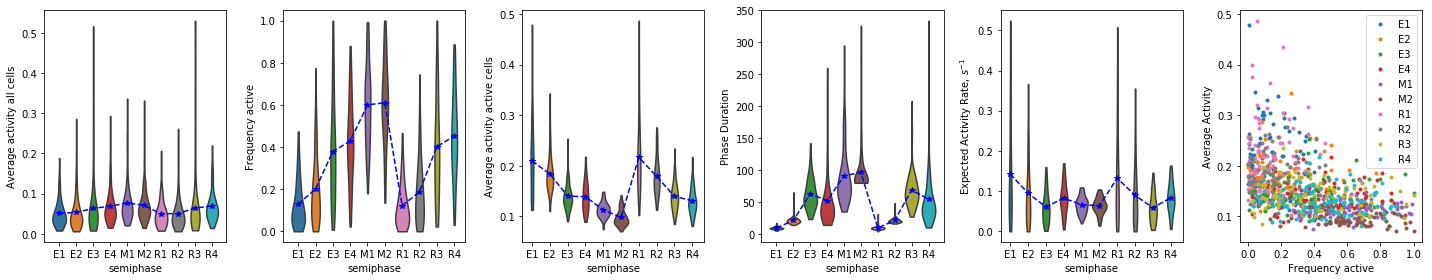

In [26]:
%matplotlib inline
phases_intervals.plot_activity_vs_active_frequency(dataDB, 'deconv', 'semiphase', 'm060', 'Correct', thrAct=0.2, haveWaiting=False)

## 2.3 Significant activity
* For each cell and each interval, test if activity in that interval significantly higher than on average for that cell
* 

deconv semiphase
doing mouse m060
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
No behaviour found for {'performance': 'Mistake', 'direction': 'L', 'session': 'm060_20190606'} ; skipping
doing mouse m061
No behaviour found for {'performance': 'Mistake', 'direction': 'R', 'session': 'm061_20190517

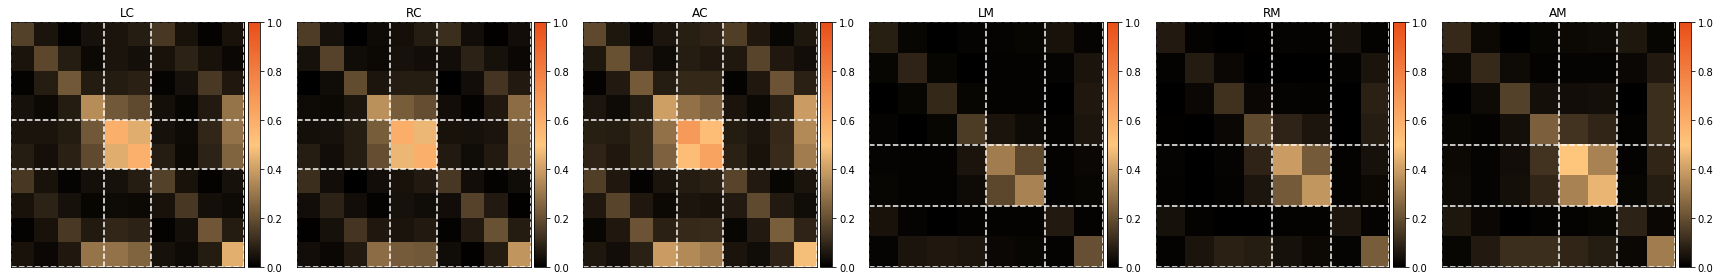

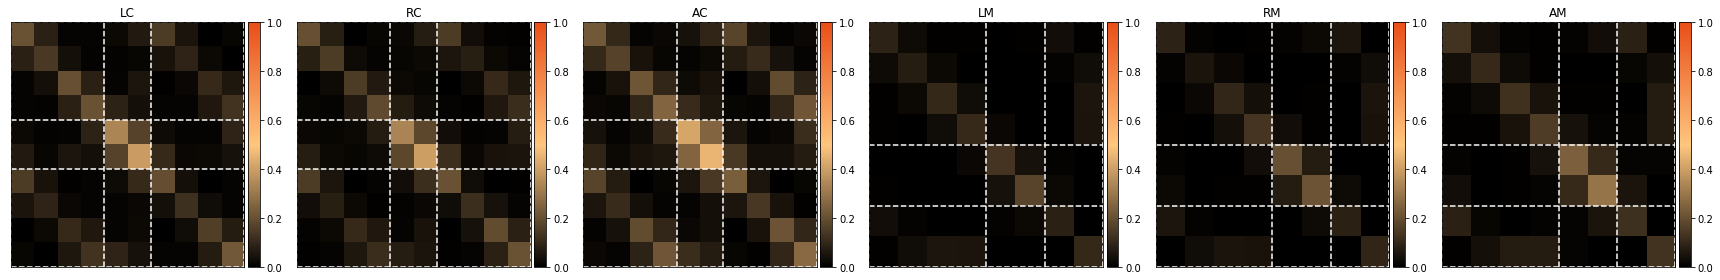

In [8]:
for datatype in ['deconv', 'raw']:
    for phasetype in ['semiphase']:#['semiphase', 'phase', 'interval']:
        print(datatype, phasetype)
        phases_intervals.plot_significant_firing_rate_by_neuron(dataDB, datatype, phasetype,
                                                                confThr=0.01, haveWaiting=False,
                                                                cmapConfusion = cmapConfusion)

## 2.4 Store significant neurons
For each interval, store neurons significantly active in that interval

In [ ]:
# Testing each phase vs remainder of the trial, storing maintenance vs encoding+retrieval
# for datatype in ['raw', 'deconv']:
#     plot_save_significantly_firing_neurons(dataDB, datatype,
#                                            'phase',
#                                            [[1], [0, 2]],
#                                            ['mt', 'enc_ret'],
#                                            confThr=0.01,
#                                            haveAll=True)
    
# phasePairIdxs = [[[0], [1]], [[0], [2]], [[1], [2]]]
# phasePairNames = [['enc', 'mt'], ['enc', 'ret'], ['mt', 'ret']]

phasePairIdxs = [[[0], [1]], [[1], [2]]]
phasePairNames = [['enc', 'mt'], ['mt', 'ret']]
    
for datatype in ['deconv']:#['raw', 'deconv']:
    for pairName, pairIdxs in zip(phasePairNames, phasePairIdxs):    
        phases_intervals.plot_save_significantly_firing_neurons(dataDB, datatype, 'phase', pairIdxs, pairName,
                                                                confThr=0.01, haveAll=True)

In [6]:
# Get indices of significant cells
from mesostat.utils.pandas_helper import pd_query
df = pd.read_hdf('significant_cells_deconv_enc.h5', 'df')
# row = pd_query(df, {'mousename' : 'm060', 'performance' : 'All', 'direction' : 'All'})
# np.array(row['cells'])
df

,mousename,performance,direction,cells
0,m060,Correct,L,"[2, 66, 36, 37, 38, 69, 75, 12, 46, 17, 49, 84..."
1,m060,Correct,R,"[1, 66, 69, 37, 38, 70, 73, 78, 17, 19, 51, 84..."
2,m060,Correct,All,"[2, 66, 36, 69, 37, 38, 72, 75, 12, 78, 46, 17..."
3,m060,Mistake,L,"[84, 62]"
4,m060,Mistake,R,"[66, 36, 37, 38, 72, 78, 84, 28, 62]"
5,m060,Mistake,All,"[66, 36, 37, 38, 72, 46, 78, 84, 28, 62]"
6,m060,All,L,"[2, 66, 36, 37, 38, 69, 75, 12, 46, 17, 84, 25..."
7,m060,All,R,"[1, 66, 69, 37, 38, 70, 72, 73, 78, 17, 49, 51..."
8,m060,All,All,"[1, 2, 12, 17, 25, 28, 33, 36, 37, 38, 46, 49,..."
9,m061,Correct,L,"[10, 12, 16, 17, 25, 30, 31]"


In [ ]:
for datatype in ['raw', 'deconv']:
    phases_intervals.plot_save_significantly_firing_neurons(dataDB, datatype, 'interval',  [[0], [1]],
                                                            ['enc_base', 'enc_reward'],
                                                            confThr=0.01, ranges=[2, 4], haveAll=True)

## 2.5 Load and test significant cells

In [ ]:
significantCellsSelectorDatatype = {}

for datatype in ['raw', 'deconv']:
    signCellsMaintenance = SignificantCells('significant_cells_'+datatype+'_mt.h5').get_cells_by_mouse()
    signCellsReward = SignificantCells('significant_cells_'+datatype+'_enc_reward.h5').get_cells_by_mouse()

    significantCellsSelectorDatatype[datatype] = {
        'None' : None,
        'Maintenance' : signCellsMaintenance,
        'Reward' : signCellsReward
    }

## 2.6 Are 'Maintenance Cells' more active than 'Encoding Cells'?

1. For each cell, compute phase-avg over time
2. For each cell, for each trial, compute ratio of ENC vs MT
3. 

$$R_{i,j,ENC} = \int_{ENC} R_{i,j}(t)dt$$
$$R_{i,j,MT} = \int_{MT} R_{i,j}(t)dt$$
$$\phi_{i,j} = \frac{R_{i,j,ENC}}{R_{i,j,MT}}$$
$$\bar \phi_{i} = \frac{1}{N_{trial}} \sum_j \phi_{i,j}$$


In [ ]:
phases_intervals.plot_ratio_enc_mt(dataDB, 'deconv')

# 3.1 Table - Discriminate Phases by Metric

In [ ]:
%%time
dataDB.verbose = False

phases = ['Encoding', 'Maintenance', 'Retrieval']
#settings = {"serial" : True, "metricSettings" : {"metric" : num_non_zero_std}}
settings = {"serial" : True, "metricSettings" :{"max_lag" : 1}}
sweepDict = {
    #"mousename" : sorted(list(dataDB.mice)),
    "datatype": ["deconv"],#, "raw", "high", "deconv"],
    "performance": ["Correct", "Mistake", "All"],
    "direction": ["L", "R", "All"]
}

table_lib.table_discriminate_time(dataDB, sweepDict,
                                         {"phase" : phases},
                                         "mean",
                                         trgDimOrder="r",
                                         settings=settings, multiplexKey="mousename")

# 3.2 Violins - Metric by Phase and Interval

In [ ]:
settings = {"serial" : True, "metricSettings" : {"max_lag" : 1}}
#settings = {"serial" : True, "metricSettings" : {"metric" : num_non_zero_std}}

        
for datatype in ['raw', 'deconv']:
    for phaseType in ['semiphase']:#['interval', 'semiphase']:
        #for signCellsName, signCells in significantCellsSelectorDatatype[datatype].items():
#         print("datatype", datatype, "Significant Cells :", signCellsName)
        print("datatype", datatype)
#         phases_intervals.plot_violins_by_phase(dataDB, datatype, phaseType, "mean", settings,
#                                                haveWaiting=False, signCellsSelector={signCellsName:signCells})
        phases_intervals.plot_violins_by_phase(dataDB, datatype, phaseType, "mean", settings,
                                               haveWaiting=False, signCellsSelector=None)